# Importing the relevant libraries

In [414]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
from prettytable import PrettyTable
import missingno as msno
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score,GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pickle
import warnings
warnings.filterwarnings("ignore")


# Loading the data

In [415]:
df = pd.read_csv("Life Expectancy Dataset.csv")

pd.set_option('display.max_columns', None)

df.head()

,Country,Region,Year,Status,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy
0,Turkiye,Middle East,2015,Economy_status_Developing,11.10,13.00,105.82,1.32,97,65,27.80,97,97,0.08,11006,78.53,4.90,4.80,7.80,76.50
1,Spain,European Union,2015,Economy_status_Developed,2.70,3.30,57.90,10.35,97,94,26.00,97,97,0.09,25742,46.44,0.60,0.50,9.70,82.80
2,India,Asia,2007,Economy_status_Developing,51.50,67.90,201.08,1.57,60,35,21.20,67,64,0.13,1076,1183.21,27.10,28.00,5.00,65.40
3,Guyana,South America,2006,Economy_status_Developing,32.80,40.50,222.20,5.68,93,74,25.30,92,93,0.79,4146,0.75,5.70,5.50,7.90,67.00
4,Israel,Middle East,2012,Economy_status_Developed,3.40,4.30,57.95,2.89,97,89,27.00,94,94,0.08,33995,7.91,1.20,1.10,12.80,81.70


# Data Description

In [416]:
df.shape

(2864, 20)

Dataset has 2938 rows and 22 columns.

## Exploring the descriptive statistics of the variables

In [417]:
df.describe(include="all")

,Country,Region,Year,Status,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy
count,2864,2864,2864.00,2864,2864.00,2864.00,2864.00,2859.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00
unique,179,9,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Turkiye,Africa,NaN,Economy_status_Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,816,NaN,2272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2007.50,NaN,30.36,42.94,192.25,4.82,84.29,77.34,25.03,86.50,86.27,0.89,11540.92,36.68,4.87,4.90,7.63,68.86
std,NaN,NaN,4.61,NaN,27.54,44.57,114.91,3.98,16.00,18.66,2.19,15.08,15.53,2.38,16934.79,136.49,4.44,4.53,3.17,9.41
min,NaN,NaN,2000.00,NaN,1.80,2.30,49.38,0.00,12.00,10.00,19.80,8.00,16.00,0.01,148.00,0.08,0.10,0.10,1.10,39.40
25%,NaN,NaN,2003.75,NaN,8.10,9.67,106.91,1.20,78.00,64.00,23.20,81.00,81.00,0.08,1415.75,2.10,1.60,1.60,5.10,62.70
50%,NaN,NaN,2007.50,NaN,19.60,23.10,163.84,4.02,89.00,83.00,25.50,93.00,93.00,0.15,4217.00,7.85,3.30,3.40,7.80,71.40
75%,NaN,NaN,2011.25,NaN,47.35,66.00,246.79,7.77,96.00,93.00,26.40,97.00,97.00,0.46,12557.00,23.69,7.20,7.30,10.30,75.40


#Preprocessing

## Removing the unnecessary features




In [418]:
df.drop(['Country', 'Region'], axis=1, inplace=True)

## Checking for missing values

<Axes: >

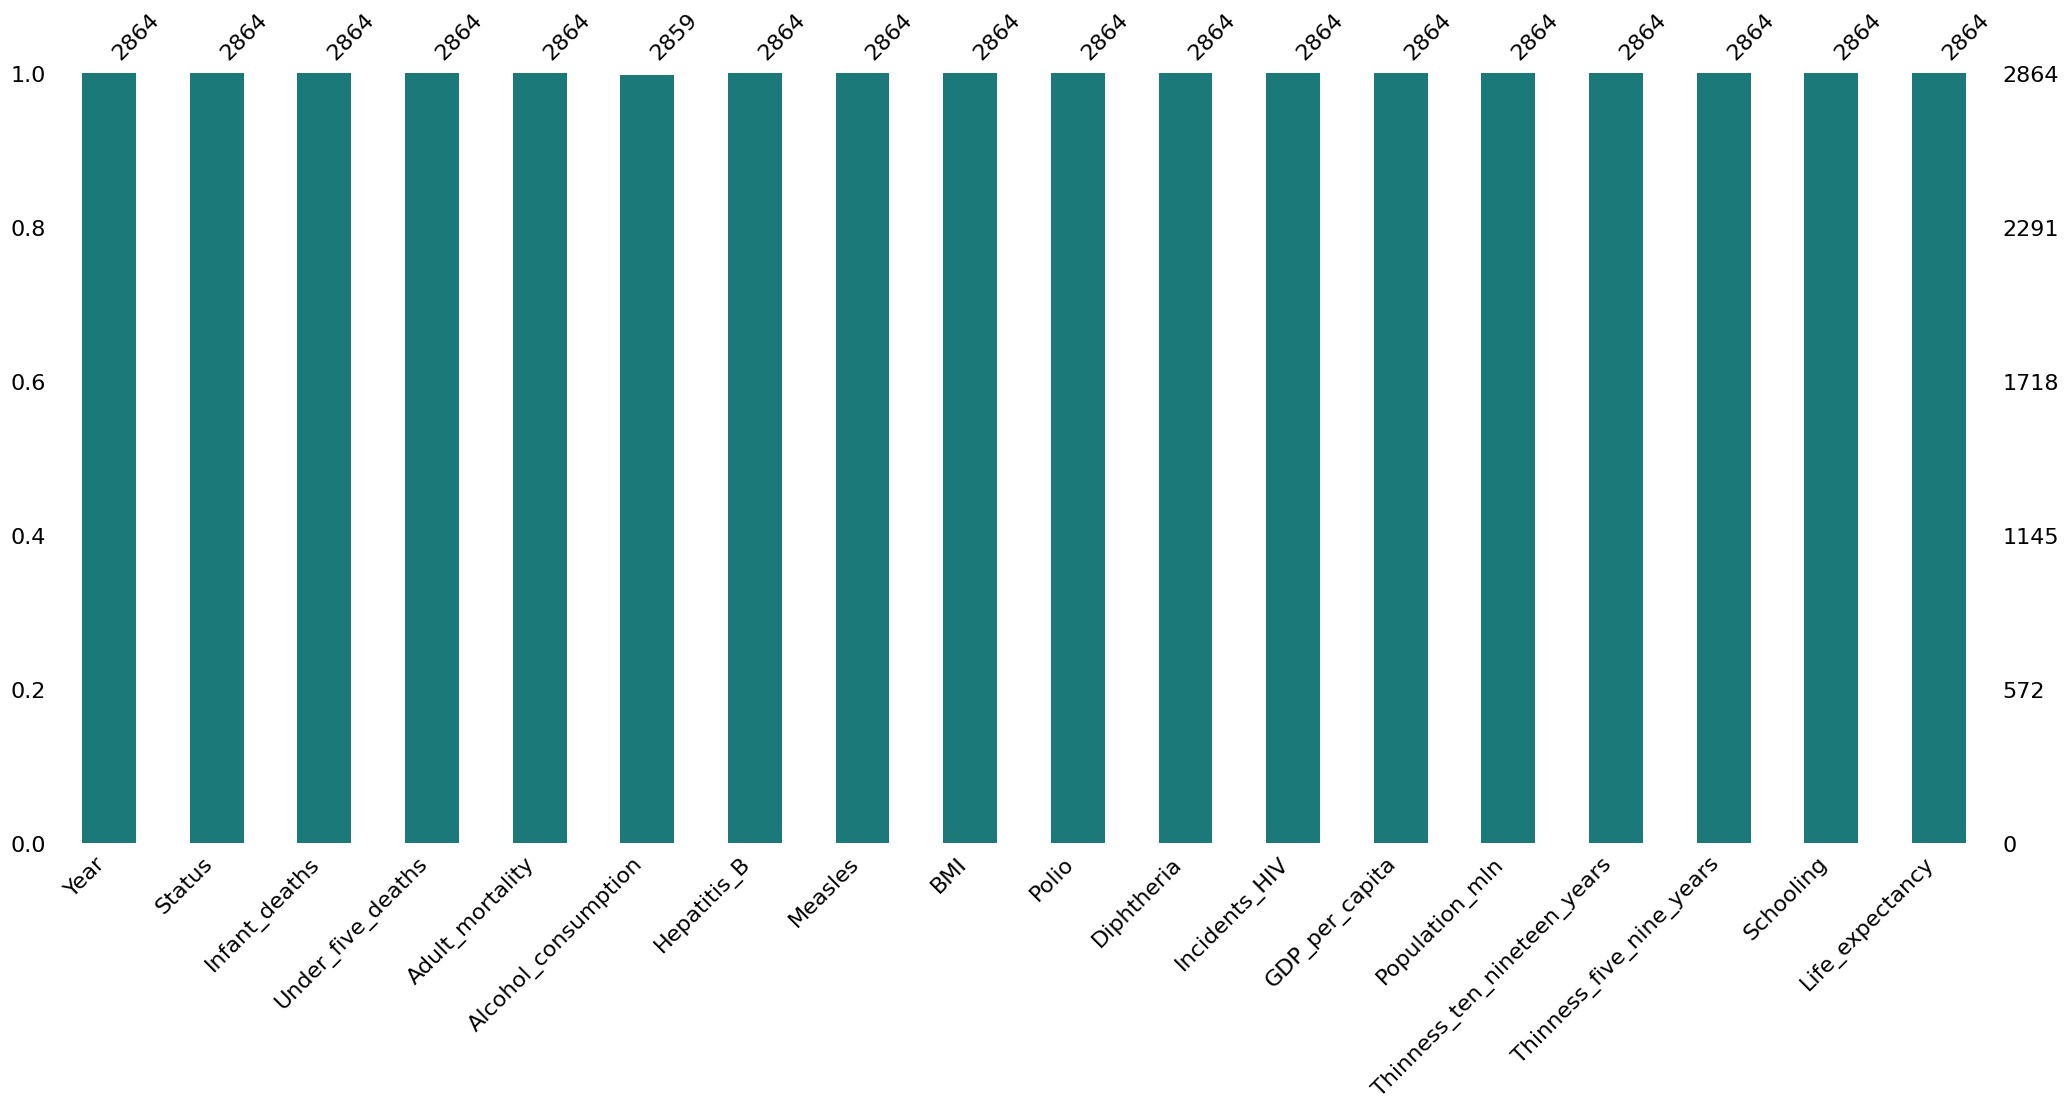

In [419]:
msno.bar(df, color='#1b7979')

"Alcohol_consumption" has missing values.W're going to replace it with its mean.


###Imputing the missing values

In [420]:
num_features_with_target = df.drop(columns=['Status'],axis = 1)

num_features_with_target_list = list(num_features_with_target.columns)


for col in num_features_with_target.columns:
    mean = df[col].mean()
    df[col]= df[col].fillna(mean)


<Axes: >

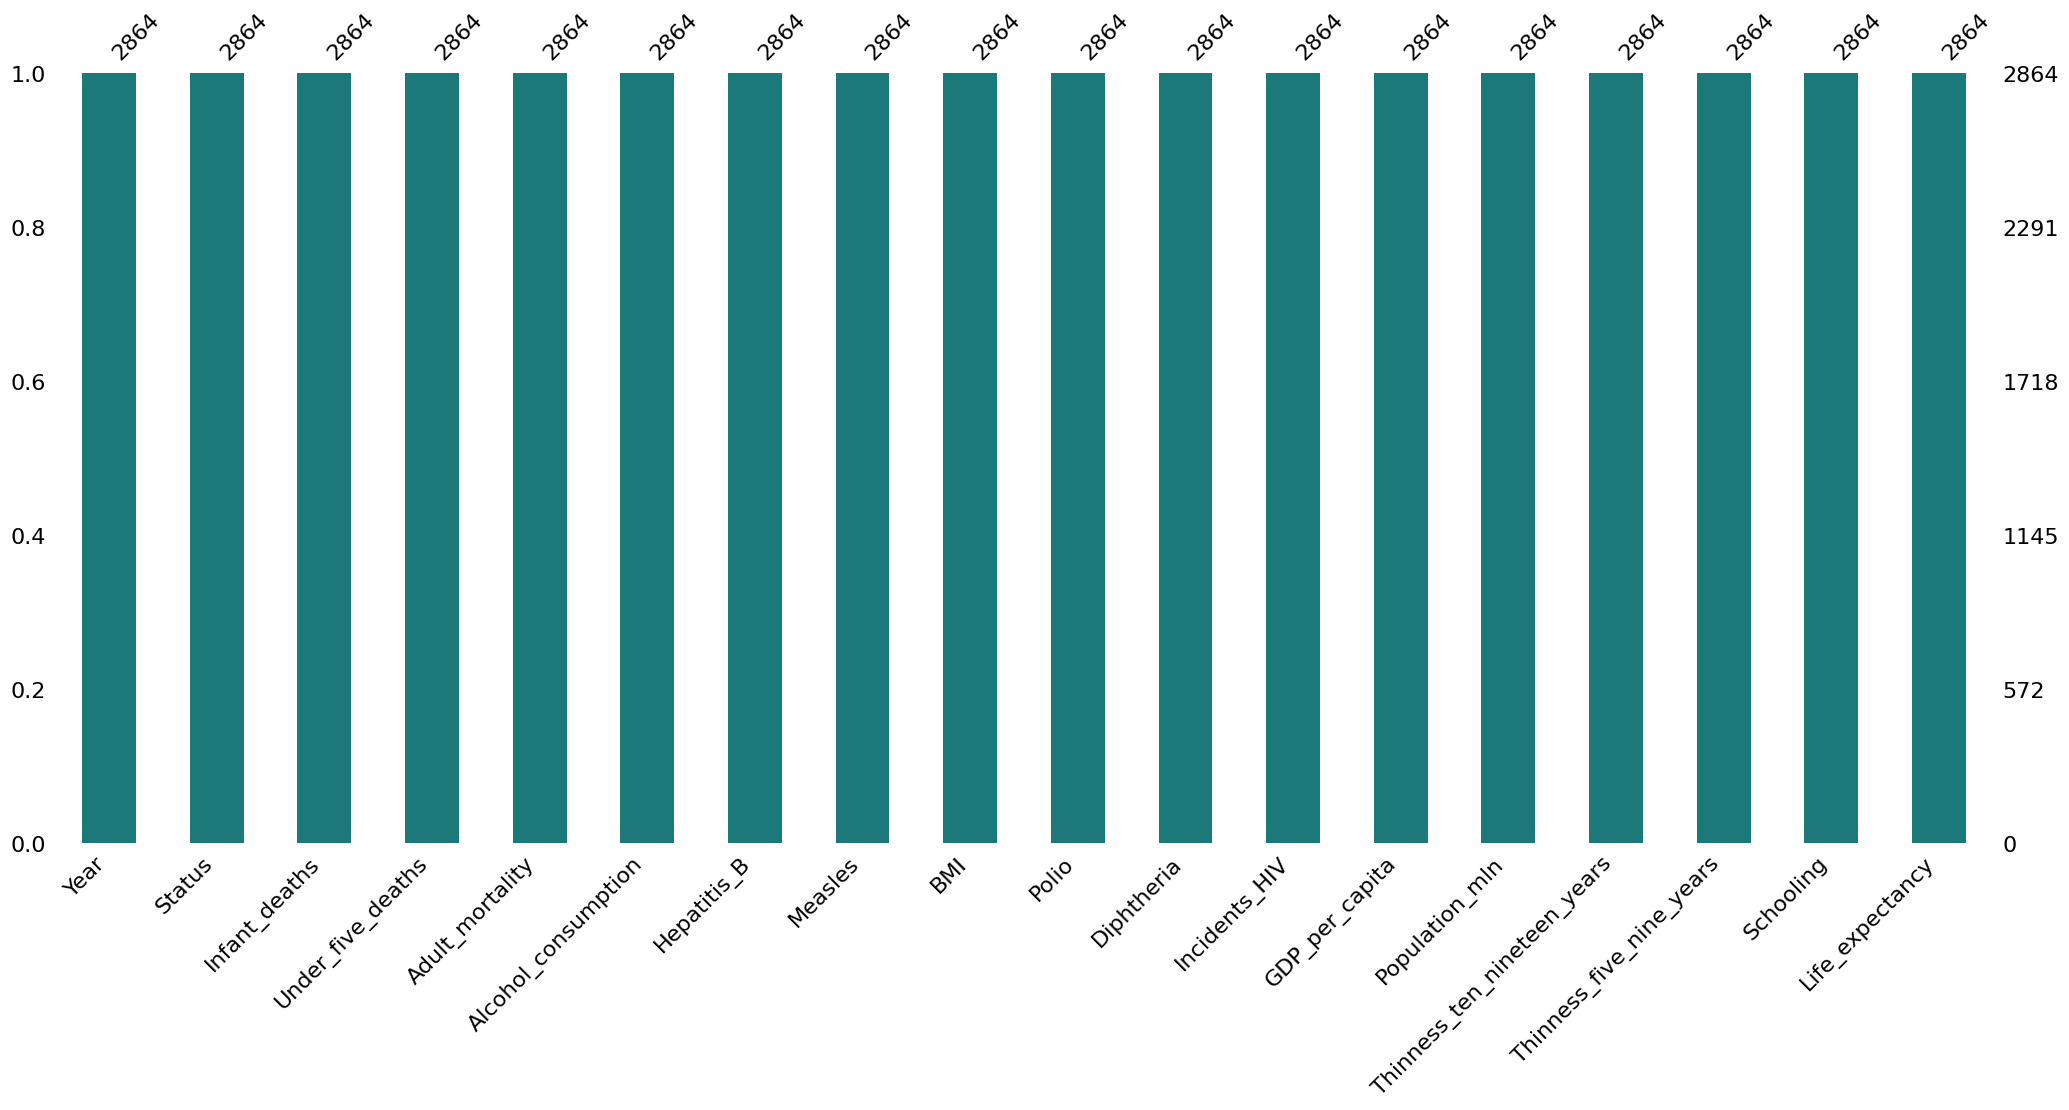

In [421]:
msno.bar(df, color='#1b7979')

#Exploratory Data Analysis

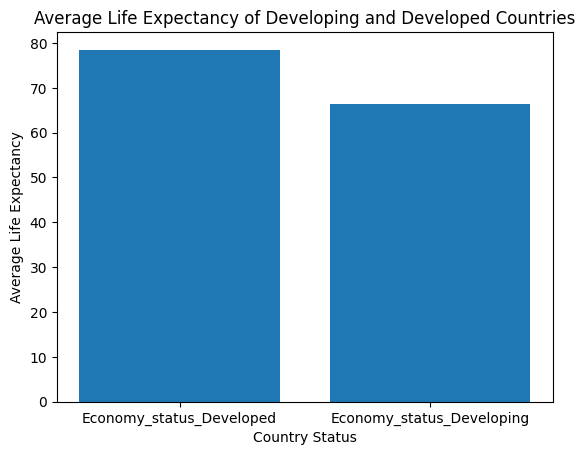

In [422]:
average_life_expectancy = df.groupby('Status')['Life_expectancy'].mean()


plt.bar(average_life_expectancy.index, average_life_expectancy.values)
plt.xlabel('Country Status')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy of Developing and Developed Countries')
plt.show()


## Exploring the PDF

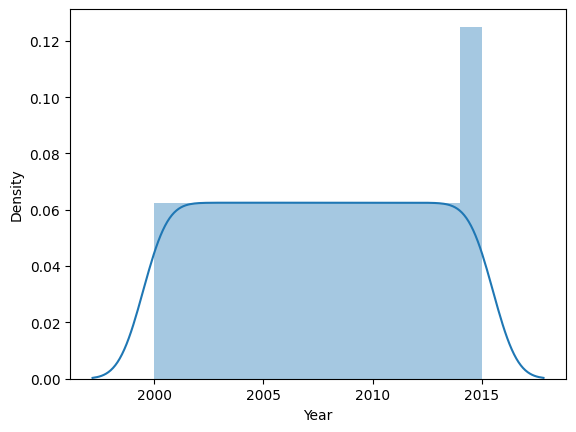

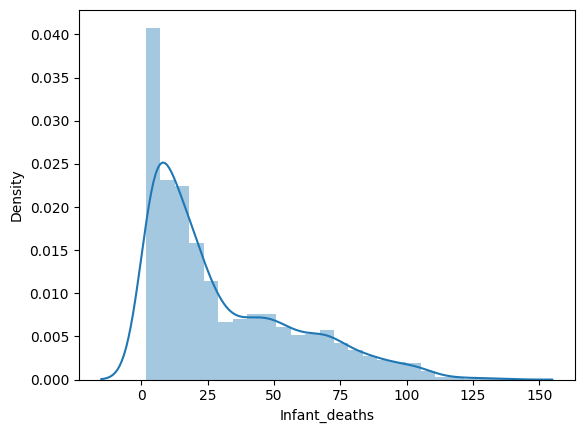

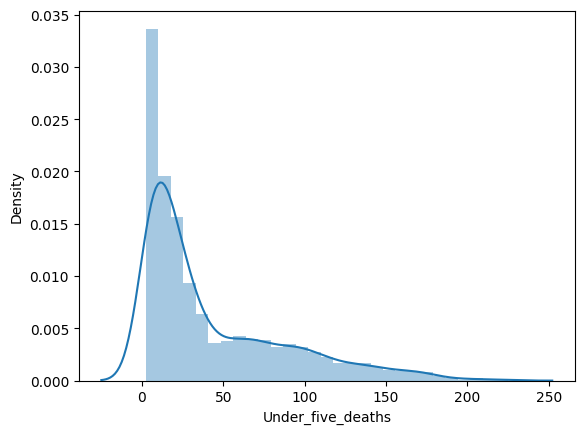

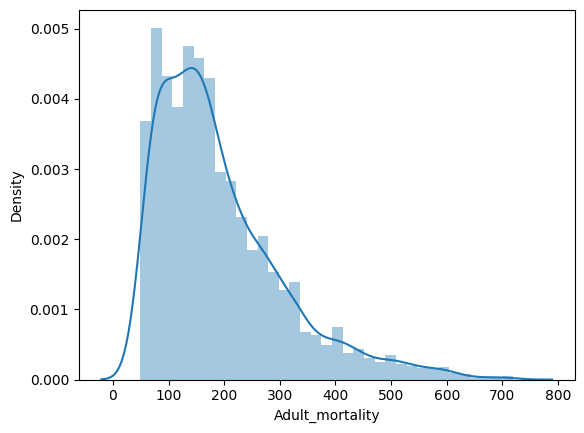

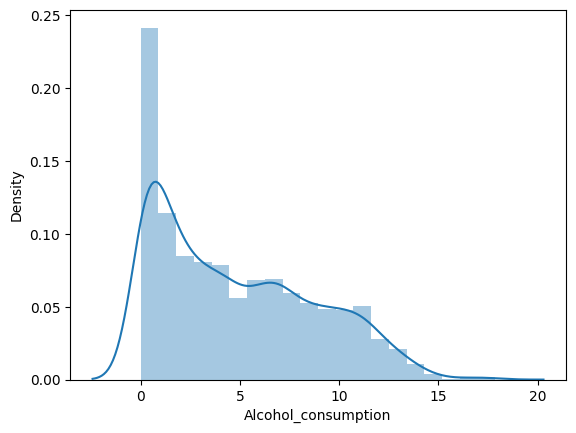

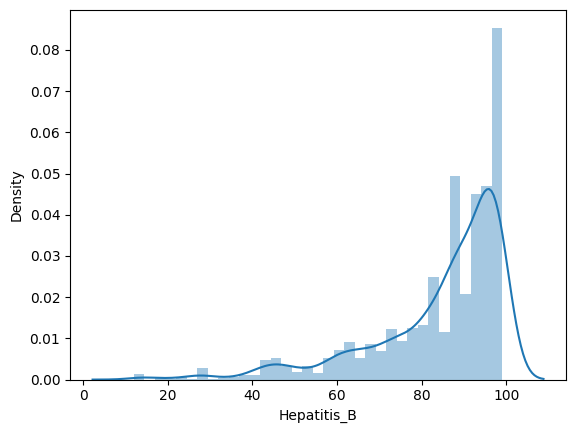

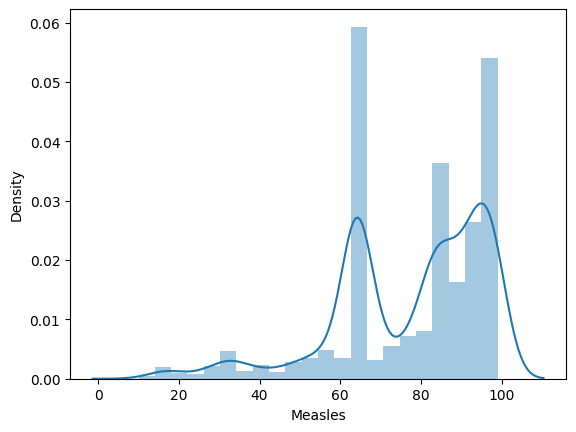

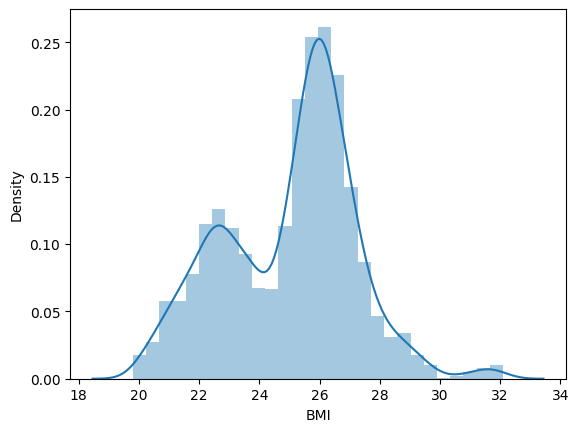

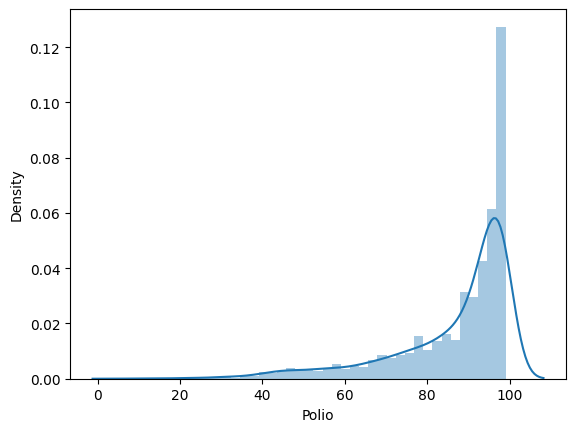

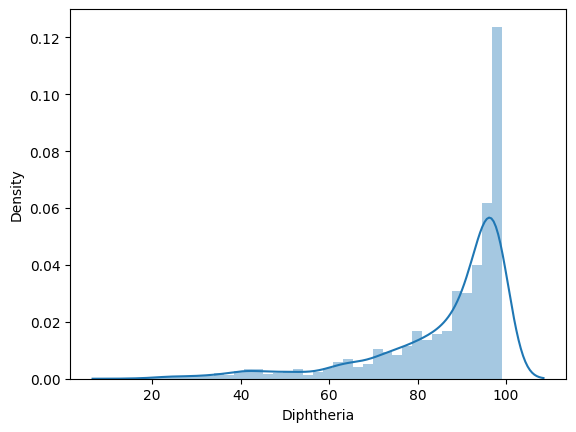

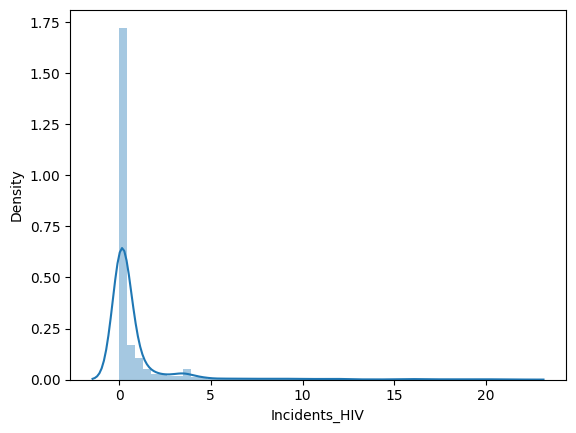

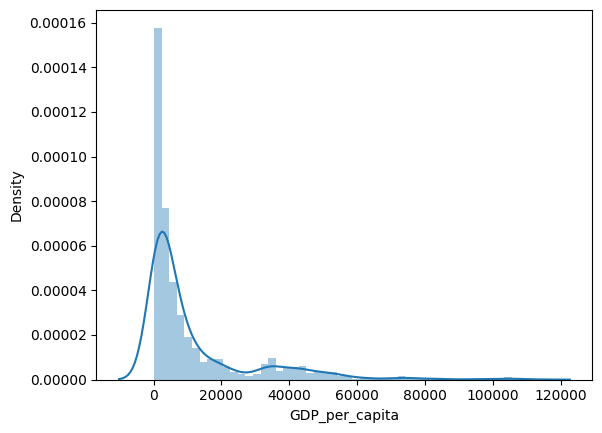

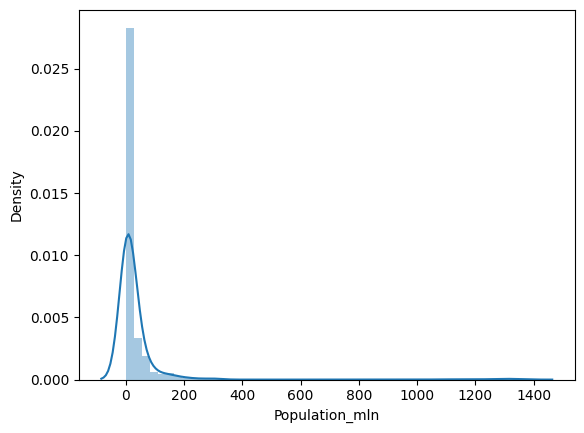

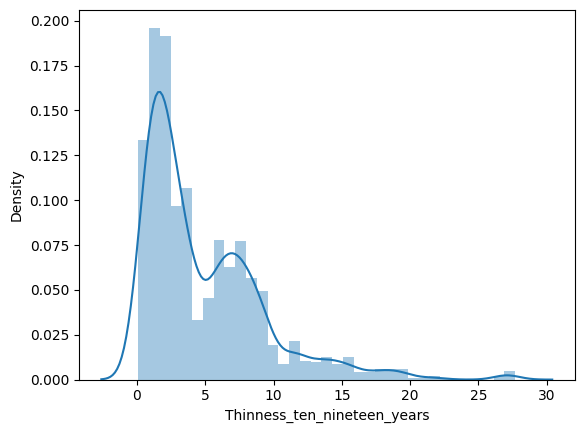

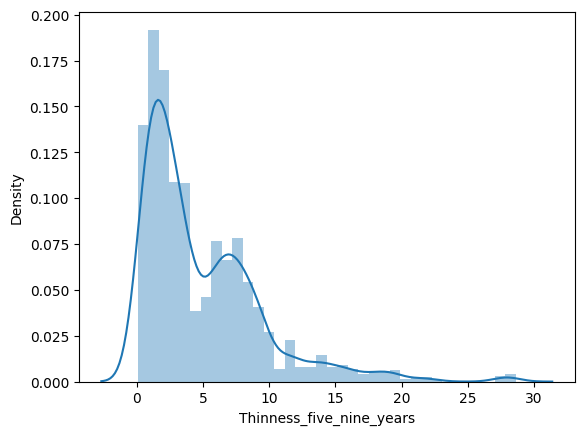

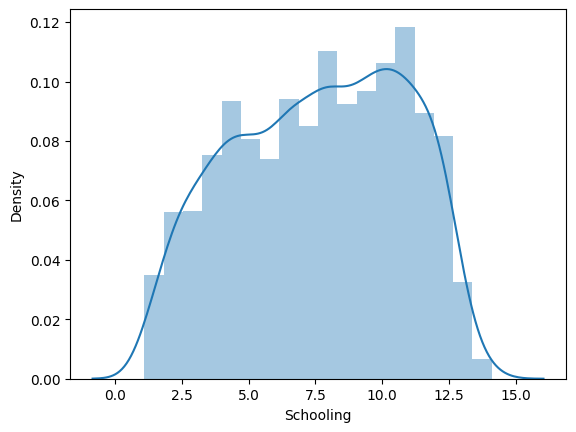

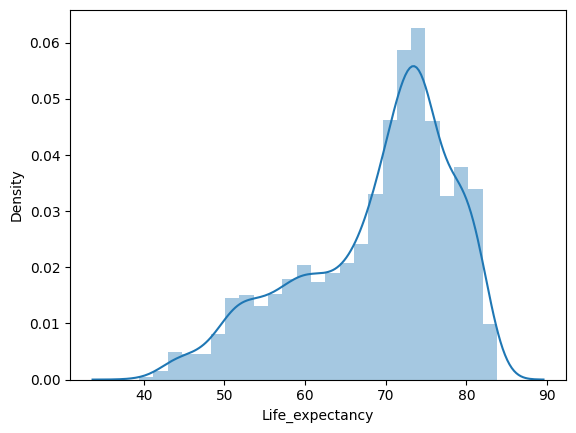

In [423]:
for col in num_features_with_target.columns:
  sns.distplot(df[col],kde=True)
  plt.show()

Some features are almost normally distributed , while most of the other features are either left-skewed or right skewed. Let's analyse it further using box plot

##Checking for outliers using Boxplots

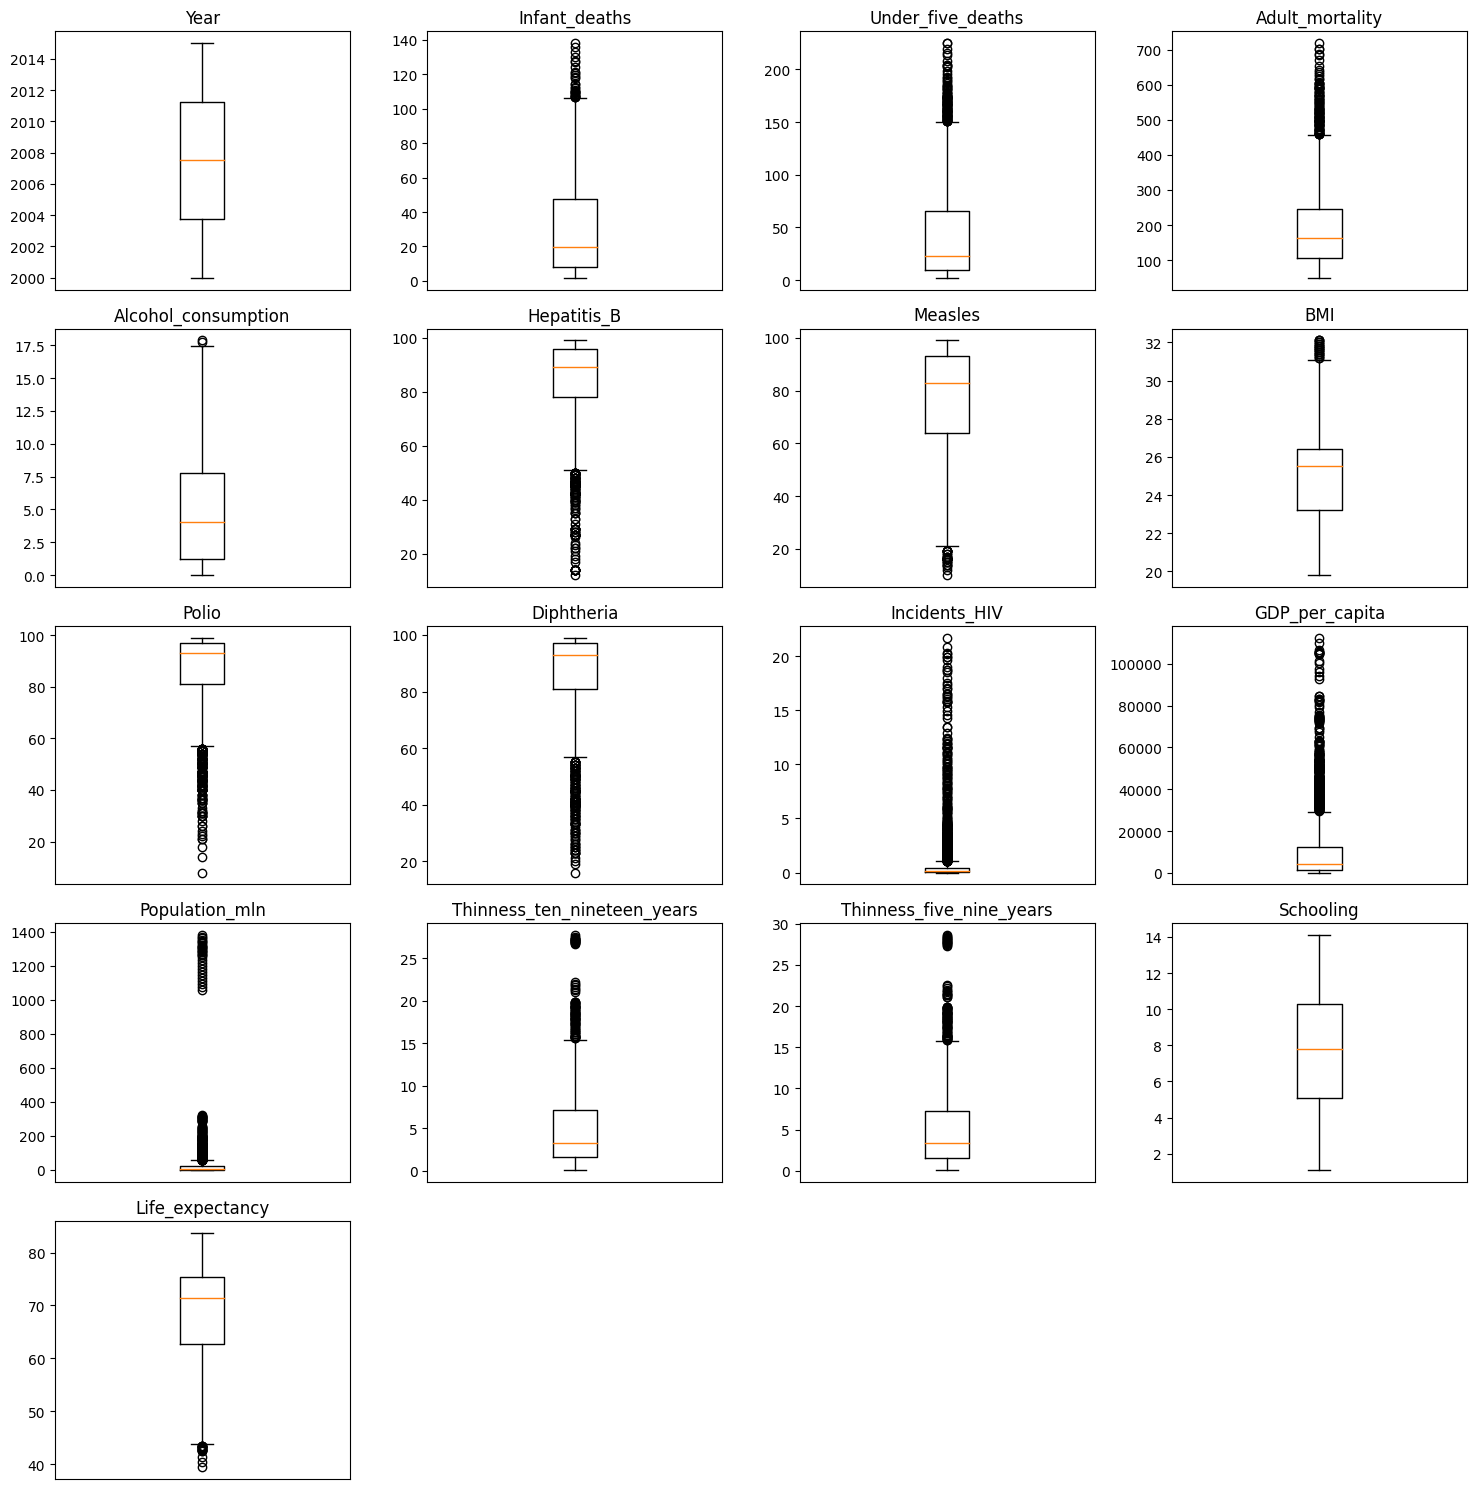

In [424]:
fig,axs= plt.subplots(5,4,figsize=(15, 15))

axs = axs.ravel()
for i, feature in enumerate(num_features_with_target.columns):
    axs[i].boxplot(df[feature])
    axs[i].set_title(feature)


for ax in axs[-3:]:
    fig.delaxes(ax)

for ax in axs:
    ax.set_xticks([])


plt.tight_layout()
plt.show()

There are many outliers present in the data but w're not removing them as they are valid data points.

##Skewness Values

In [425]:
for column in num_features_with_target.columns:
  print(f'Skewness value of {column}: ',df[column].skew())

Skewness value of Year:  0.0
Skewness value of Infant_deaths:  1.1041224133509526
Skewness value of Under_five_deaths:  1.3780538841459786
Skewness value of Adult_mortality:  1.3776826570907914
Skewness value of Alcohol_consumption:  0.5728180506663301
Skewness value of Hepatitis_B:  -1.65897331259755
Skewness value of Measles:  -0.9940082699358503
Skewness value of BMI:  -0.12110644058446564
Skewness value of Polio:  -1.7264515378078893
Skewness value of Diphtheria:  -1.8269276077713748
Skewness value of Incidents_HIV:  4.9787352011149135
Skewness value of GDP_per_capita:  2.3772483883265685
Skewness value of Population_mln:  8.157683539934656
Skewness value of Thinness_ten_nineteen_years:  1.7014870785340386
Skewness value of Thinness_five_nine_years:  1.7691829776091126
Skewness value of Schooling:  -0.15941024460085723
Skewness value of Life_expectancy:  -0.7702416098733306


# Checking the OLS assumptions

## 1) Linearity

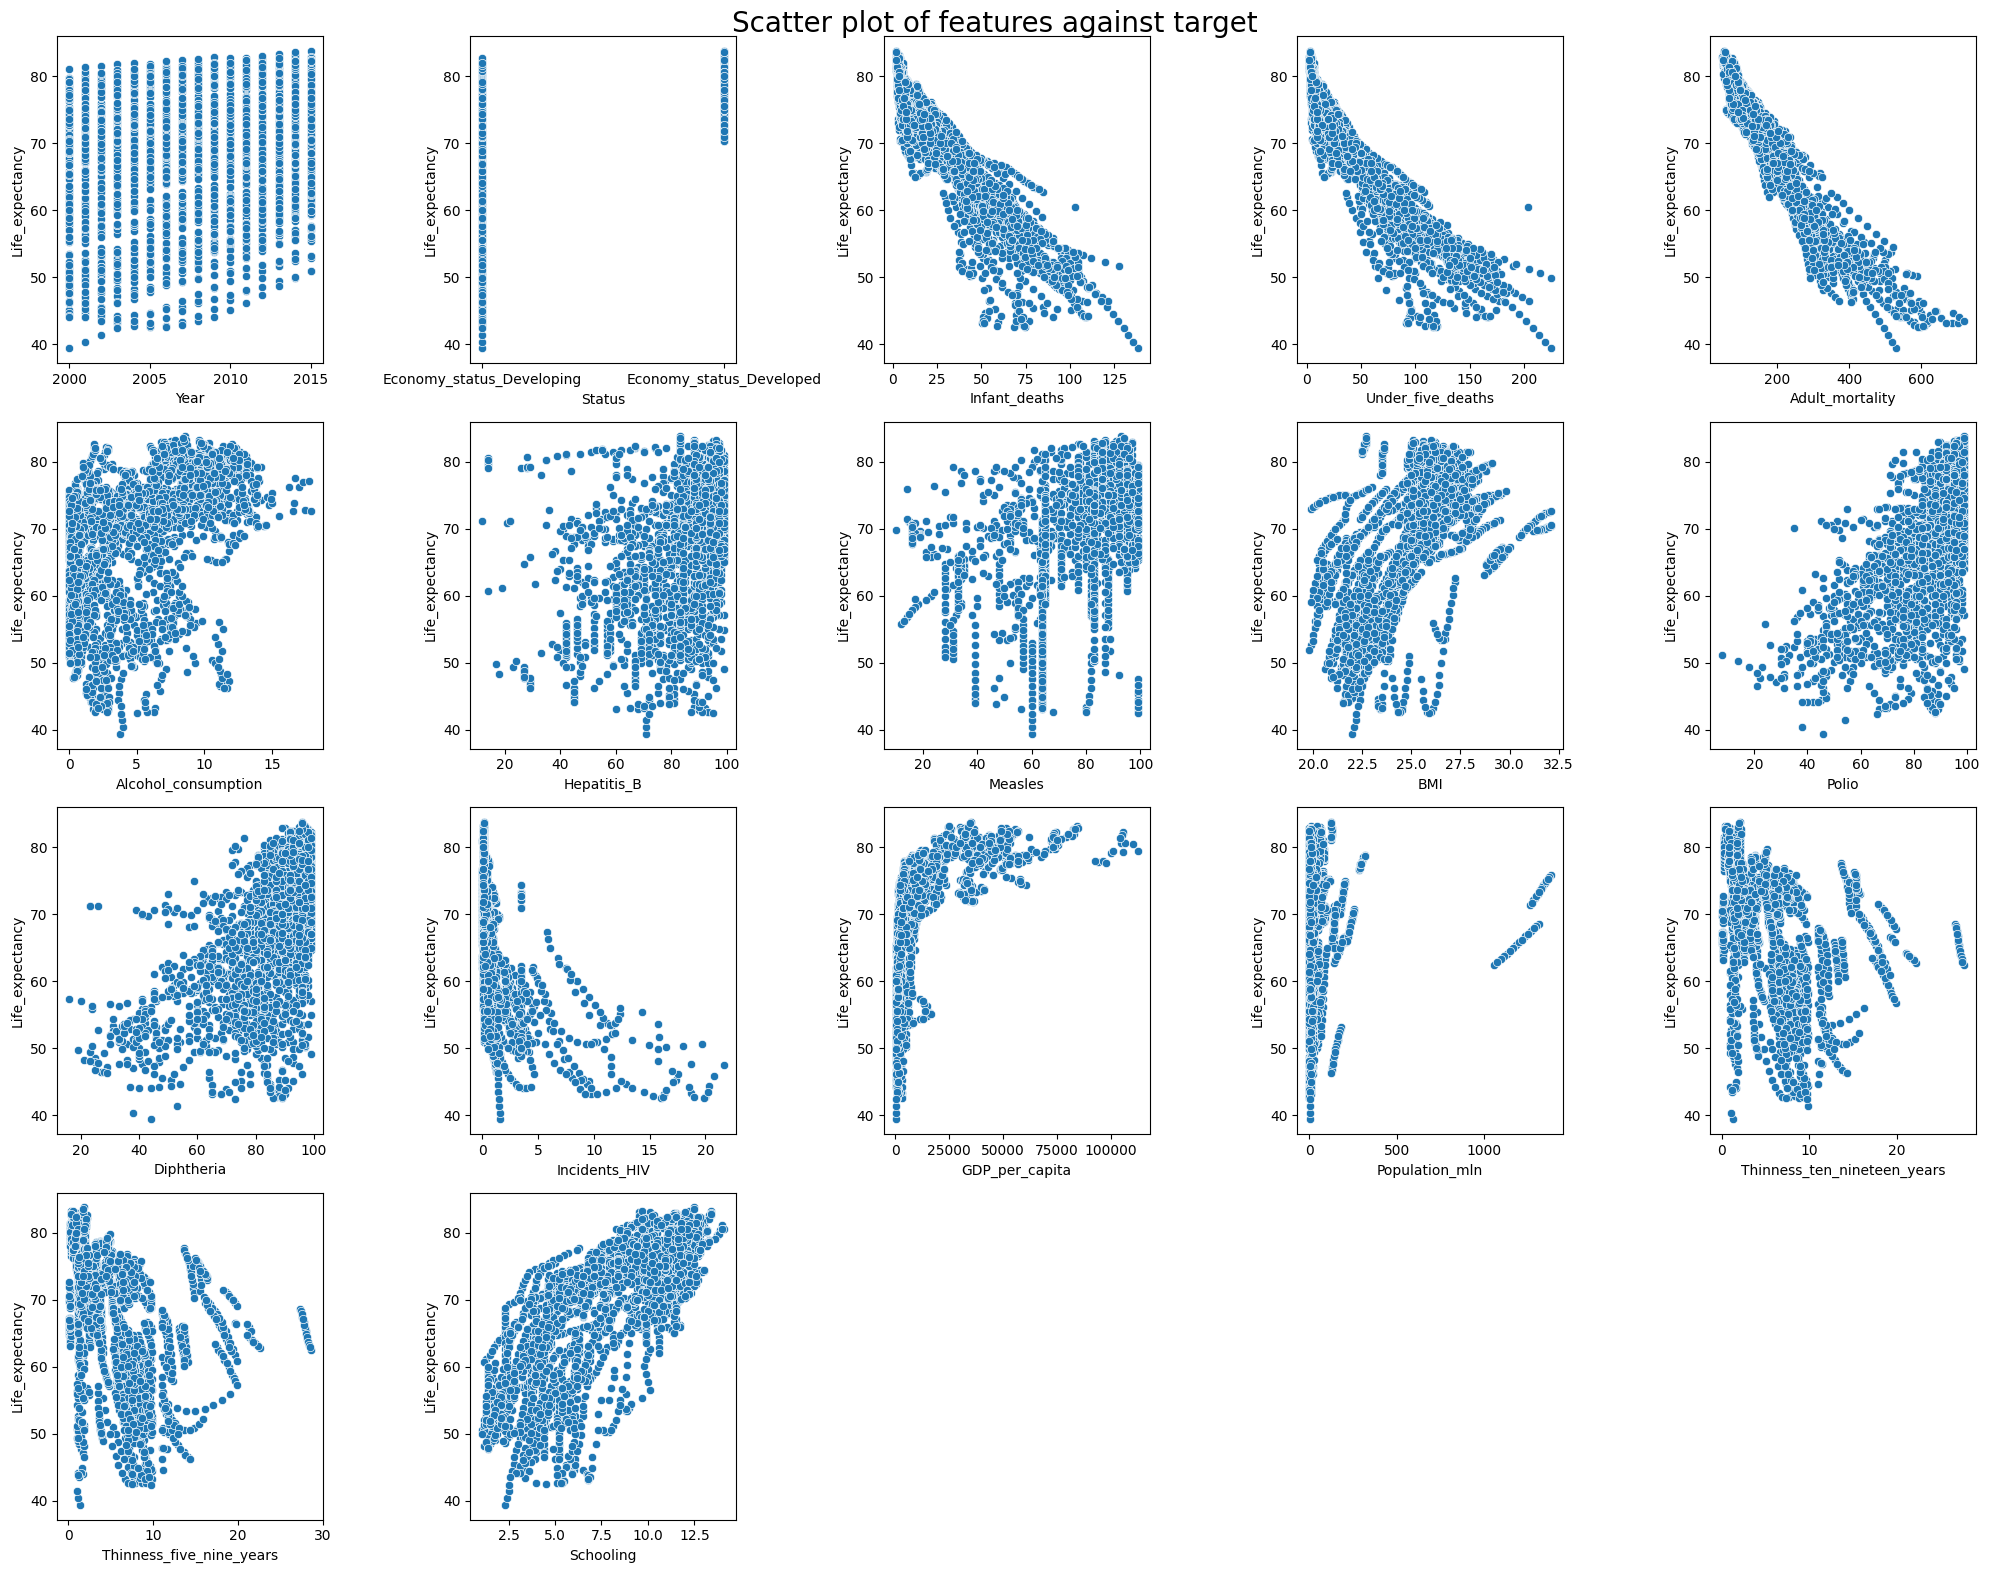

In [426]:

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20,16))

cont_features = df.drop(columns=['Life_expectancy'],axis = 1)

for i, column in enumerate(df.columns[:-1]):
    row = i // 5
    col = i % 5

    sns.scatterplot(x=column, y='Life_expectancy', data=df, ax=axes[row, col])


    # axes[row, col].set_title(column)


fig.suptitle('Scatter plot of features against target', fontsize=20)
subplots_to_remove = [axes[3,2], axes[3,3], axes[3,4]]
for ax in subplots_to_remove:
    fig.delaxes(ax)

plt.tight_layout()


plt.show()


It is evident from the graphs that some features like (adult mortality, schooling, infant_deaths etc) are linearly related with the target variable while others are not. We will not applying any transformation technique at this stage. First, we will determine top 4 or 5 important features and then we will apply transformation technique if needed.

# Feature Engineering

## Encoding(One-hot) the categorical variables

In [427]:
df = pd.get_dummies(df, columns = ['Status'],
                    drop_first=True)

df.head(10)

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Status_Economy_status_Developing
0,2015,11.10,13.00,105.82,1.32,97,65,27.80,97,97,0.08,11006,78.53,4.90,4.80,7.80,76.50,1
1,2015,2.70,3.30,57.90,10.35,97,94,26.00,97,97,0.09,25742,46.44,0.60,0.50,9.70,82.80,0
2,2007,51.50,67.90,201.08,1.57,60,35,21.20,67,64,0.13,1076,1183.21,27.10,28.00,5.00,65.40,1
3,2006,32.80,40.50,222.20,5.68,93,74,25.30,92,93,0.79,4146,0.75,5.70,5.50,7.90,67.00,1
4,2012,3.40,4.30,57.95,2.89,97,89,27.00,94,94,0.08,33995,7.91,1.20,1.10,12.80,81.70,0
5,2006,9.80,11.20,95.22,4.19,88,86,26.40,89,89,0.16,9110,4.35,2.00,1.90,7.90,78.20,1
6,2015,6.60,8.20,223.00,8.06,97,97,26.20,97,97,0.08,9313,144.10,2.30,2.30,12.00,71.20,1
7,2000,8.70,10.10,192.97,12.23,88,99,25.90,99,99,0.08,8971,10.21,2.30,2.30,10.20,71.20,0
8,2001,22.00,26.10,129.76,0.52,97,87,27.90,97,99,0.13,3708,5.22,4.00,3.90,9.60,71.90,1
9,2008,15.30,17.80,217.86,7.72,97,92,26.50,96,90,0.43,2235,2.87,2.90,3.10,10.90,68.70,1


## Feature Selection

### Pearson's Coorelation

Text(0.5, 1.0, 'Correlation Matrix')

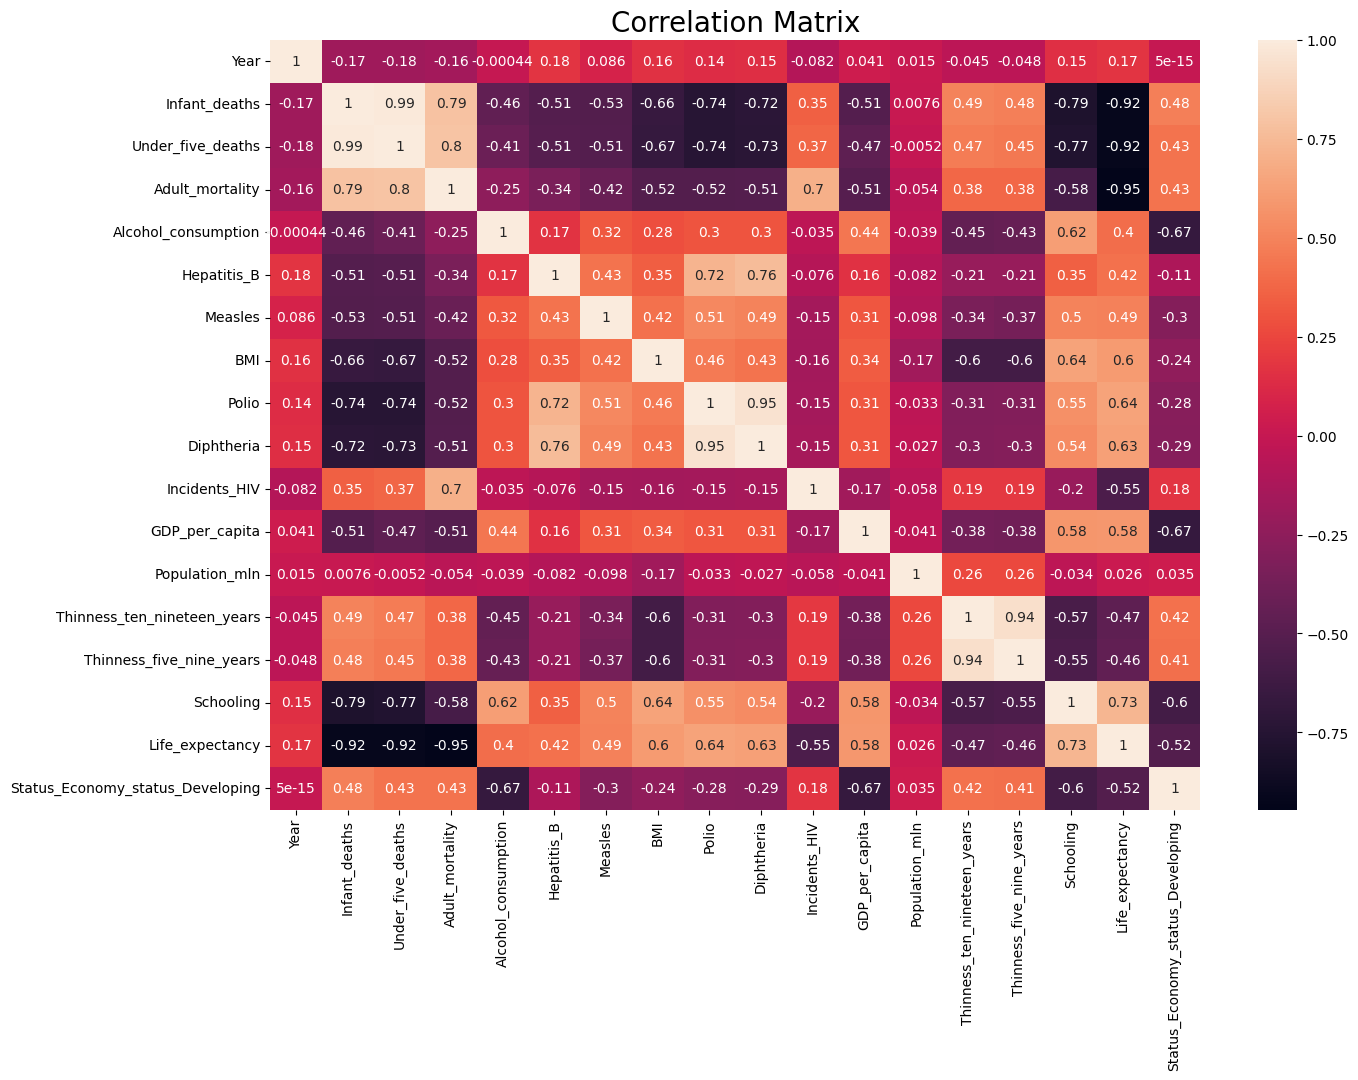

In [428]:
plt.figure(figsize=(15, 10))

sns.heatmap(df.corr(), annot=True);

plt.title('Correlation Matrix', fontsize=20)


From the heat map, it can be seen that "adult mortality", "infant deaths","under five deaths" are highly correlated with life expectancy.

In [429]:
features = df.drop(columns=['Life_expectancy'],axis = 1)

target = df['Life_expectancy']

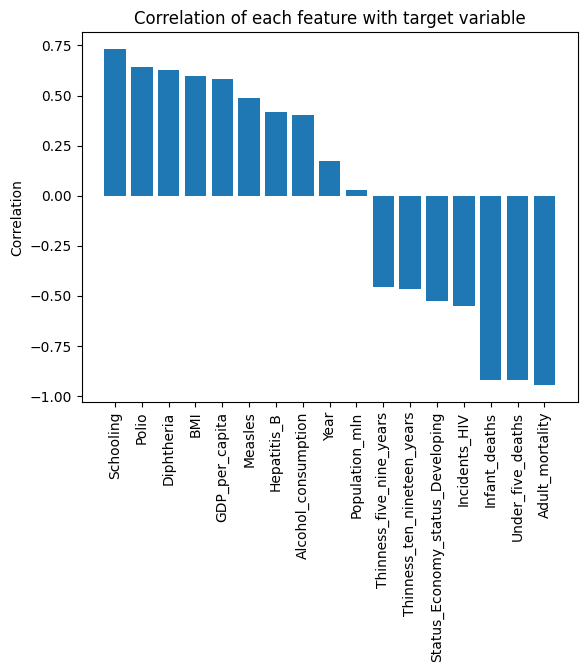

In [430]:
corr = df.corr()['Life_expectancy'].sort_values(ascending=False)[1:]

# create bar graph of correlations
plt.bar(x=corr.index, height=corr.values)
plt.xticks(rotation=90)
plt.ylabel('Correlation')
plt.title('Correlation of each feature with target variable')
plt.show()

###F-regression

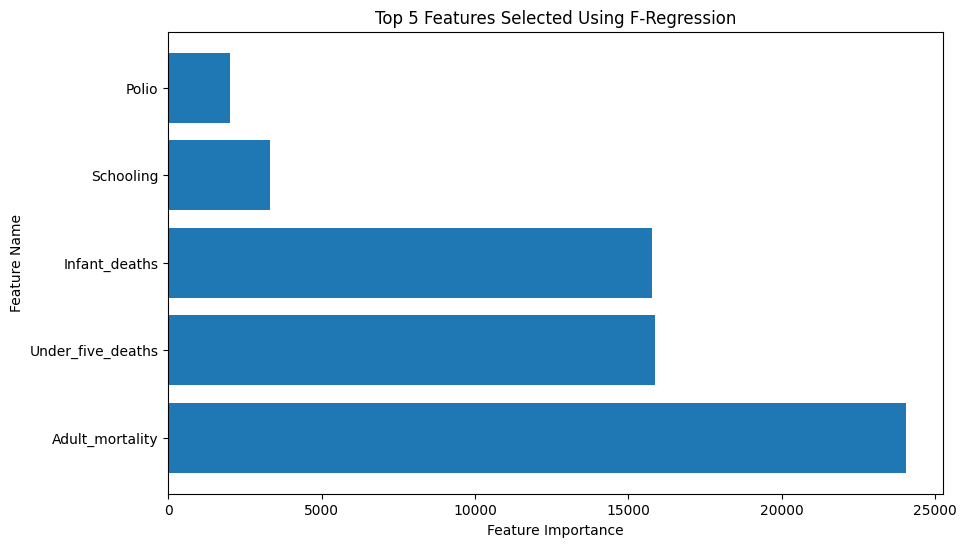

In [431]:
k = 5
selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(features, target)


selected_features = features.columns[selector.get_support()]


scores = selector.scores_

feature_scores = dict(zip(features.columns, scores))


sorted_feature_scores = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)


top_k_features = sorted_feature_scores[:k]


plt.figure(figsize=(10,6))
plt.barh(range(len(top_k_features)), [val[1] for val in top_k_features], align='center')
plt.yticks(range(len(top_k_features)), [val[0] for val in top_k_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title(f'Top {k} Features Selected Using F-Regression')
plt.show()

###Mutual Info

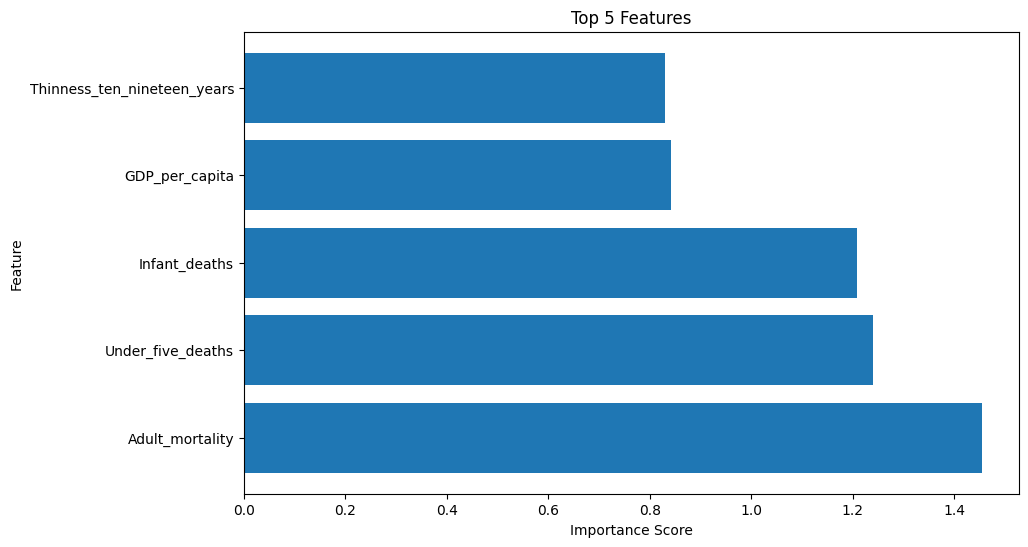

In [432]:
selector = SelectKBest(mutual_info_regression, k=5)


selector.fit(features, target)


scores = selector.scores_


names = features.columns


k_imp_features = pd.DataFrame({'feature': names, 'score': scores})


k_imp_features = k_imp_features.sort_values(by=['score'], ascending=False)


plt.figure(figsize=(10,6))
plt.barh(k_imp_features['feature'][:5], k_imp_features['score'][:5])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 5 Features')
plt.show()

We will be going with top 5 features that were determined using pearson's coorelation technique.

### Checking for second OLS asssumption (Multicollinearity)

In [433]:
top_4_features = df.loc[:, ['Schooling','Adult_mortality','Infant_deaths','Under_five_deaths']]

In [434]:
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(top_4_features.values, i) for i in range(top_4_features .shape[1])]

vif["features"] =top_4_features.columns

vif

,VIF,features
0,2.79,Schooling
1,10.59,Adult_mortality
2,71.36,Infant_deaths
3,67.61,Under_five_deaths


It seems like "Infant_deaths" is definitely too coorelated with other variables. Therefore, we will drop it.


In [435]:
top_3_features = df.loc[:,['Schooling','Adult_mortality','Under_five_deaths']]

In [436]:
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(top_3_features.values, i) for i in range(top_3_features .shape[1])]

vif["features"] =top_3_features .columns

vif

,VIF,features
0,2.60,Schooling
1,10.40,Adult_mortality
2,6.86,Under_five_deaths


All the VIF's meet the acceptance level now.

# Model Development

## Train Test Split

In [437]:
x_train, x_test, y_train, y_test = train_test_split(top_3_features, target, test_size=0.2, random_state=42)

We will be sscaling the data after the splitting to avoid data leakage.

## Scaling the data

In [438]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)

with open("fitted_scaler.pkl", "wb") as file:
    pickle.dump(scaler,file)

## Ordinary Least Square

In [439]:
x = sm.add_constant(x_train)

OLS = sm.OLS(y_train,x).fit()

OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 2.679e+04
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:41:18   Log-Likelihood:                -4293.1
No. Observations:                2291   AIC:                             8594.
Df Residuals:                    2287   BIC:                             8617.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.7972      0.033   2087.481      0.000      68.733      68.862
x1             1.0610      0.053     20.197      0.000       0.958       1.164
x2            -5.6245      0.056   -100.808      0.000      -5.734      -5.515
x3            -3.3749      0.072    -47.165      0.000      -3.515      -3.235
==============================================================================
Omnibus:                       12.488   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.577
Skew:                          -0.048   Prob(JB):                     0.000251
Kurtosis:                       3.406   Cond. No.                         4.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Important information from the model summary:
1. Overall model is significant as prob(F-statistic) < 0.05.
2. All the coefficients and constant term are also significant as their p|t| < 0.05.
3. No Auto-coorelation (Assumption of OLS) as Durbin-Watson is almost 2.
4. Coefficient Values indicates that there is no Endogenity (Assumption of OLS).   


###  Evaluation

#### Scatter plot (Training data)

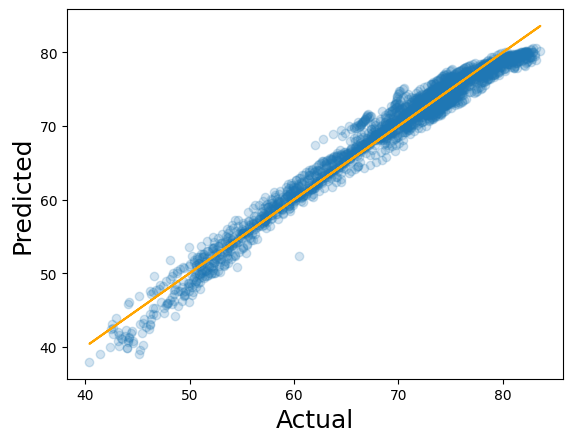

In [440]:
y_hat = OLS.predict(x)

plt.scatter(y_train, y_hat,alpha=0.2)

plt.xlabel('Actual',size=18)

plt.ylabel('Predicted',size=18)

plt.plot(y_train,y_train,'orange')

plt.show()


From the above model, it is evident that our model is good at predicting higher life expectancies.

#### Residual plot plot (Training data)

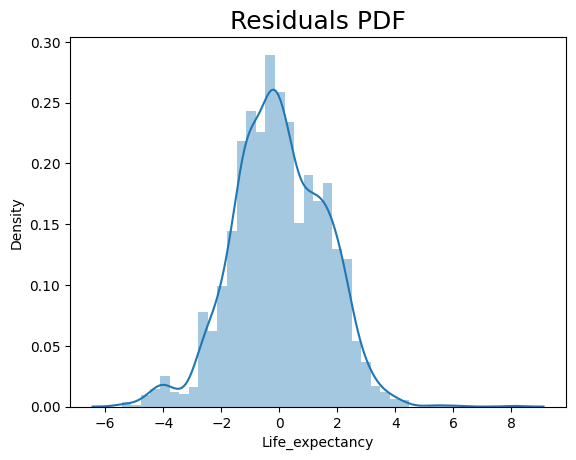

In [441]:
sns.distplot(y_train - y_hat)

plt.title("Residuals PDF", size=18)

plt.show()

#### Scatter plot (Test data)

In [442]:
x = sm.add_constant(x_test)
y_hat_test = OLS.predict(x)

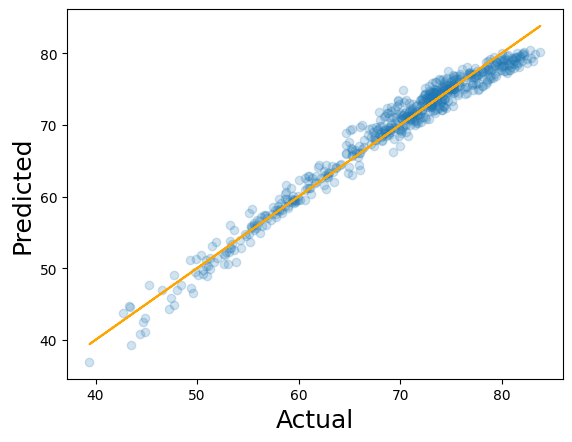

In [443]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Actual',size=18)
plt.ylabel('Predicted',size=18)
plt.plot(y_test,y_test,'orange')
plt.show()

In [444]:
OLS_train_mse = mean_squared_error(y_train, y_hat)
OLS_test_mse = mean_squared_error(y_test, y_hat_test)
OLS_train_mae = mean_absolute_error(y_train, y_hat)
OLS_test_mae = mean_absolute_error(y_test, y_hat_test)
OLS_train_r2 = r2_score(y_train, y_hat)
OLS_test_r2 = r2_score(y_test, y_hat_test)

table_ols = PrettyTable()
table_ols.field_names = ["Evaluation Metric", "Training Set", "Test Set"]


table_ols.add_row(["Mean Squared Error (MSE)", OLS_train_mse, OLS_test_mse])
table_ols.add_row(["Mean Absolute Error (MAE)", OLS_train_mae, OLS_test_mae])
table_ols.add_row(["R-Square", OLS_train_r2 , OLS_test_r2])

print(table_ols)

+---------------------------+--------------------+--------------------+
|     Evaluation Metric     |    Training Set    |      Test Set      |
+---------------------------+--------------------+--------------------+
|  Mean Squared Error (MSE) | 2.4840611886593877 | 2.410284916354066  |
| Mean Absolute Error (MAE) | 1.2511028000350304 | 1.2162233790095418 |
|          R-Square         | 0.9723312737061953 | 0.9709573448109661 |
+---------------------------+--------------------+--------------------+


Since there is not much difference between the mean squared error of the training and test datasets, it can be concluded that our model is neither overfitting nor underfitting.

### Prediction

In [445]:
OLS_df = pd.DataFrame(y_hat_test, columns=['Predicted'])

OLS_df['Actual'] = y_test

y_test = y_test.reset_index(drop=True)

OLS_df['Actual'] = y_test

OLS_df['Residual'] = OLS_df['Actual'] - OLS_df['Predicted']

OLS_df['Difference%'] = np.absolute(OLS_df['Residual']/OLS_df['Actual']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

sorted_OLS_df=OLS_df.sort_values(by=['Difference%'])

df_sorted = sorted_OLS_df.reset_index(drop=True)

sorted_OLS_df.head(20)


,Predicted,Actual,Residual,Difference%
288,72.10,72.10,-0.00,0.00
238,58.70,58.70,0.00,0.00
196,77.00,77.00,-0.00,0.00
286,59.50,59.50,0.00,0.00
101,69.01,69.00,-0.01,0.01
107,58.21,58.20,-0.01,0.02
431,53.41,53.40,-0.01,0.02
208,73.02,73.00,-0.02,0.03
556,70.87,70.90,0.03,0.04
151,72.13,72.10,-0.03,0.04


### Evaluating the aggregate performance

In [446]:
OLS_df.describe()

,Predicted,Actual,Residual,Difference%
count,573.00,573.00,573.00,573.00
mean,69.06,69.09,0.03,1.79
std,8.94,9.12,1.55,1.48
min,36.92,39.40,-4.62,0.00
25%,64.08,63.70,-0.97,0.60
50%,71.90,71.50,-0.09,1.46
75%,75.42,75.20,1.01,2.57
max,80.44,83.80,4.23,9.72


Let's go through some highlights:

The minimum difference in percentages is 0 %. So the output was spot on.

The maximum difference in percentages is slightly high.

## Ridge Regression

### Hyperparameter tuning

In [447]:
ridge = Ridge()
param_grid = {
    'alpha':[0.1,1,10]
}

ridge_grid = GridSearchCV(
    ridge,param_grid,cv=5,
    scoring = 'neg_mean_squared_error',
    return_train_score=True
)



In [448]:
ridge_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [449]:
ridge_grid.best_params_

{'alpha': 1}

In [450]:
best_ridge_params = ridge_grid.best_params_

In [451]:
ridge_model= Ridge(**best_ridge_params)

In [452]:
ridge_model.fit(x_train, y_train)

Ridge(alpha=1)

In [453]:
y_hat = ridge_model.predict(x_train)

###Evaluation

#### Scatter plot (Training data)

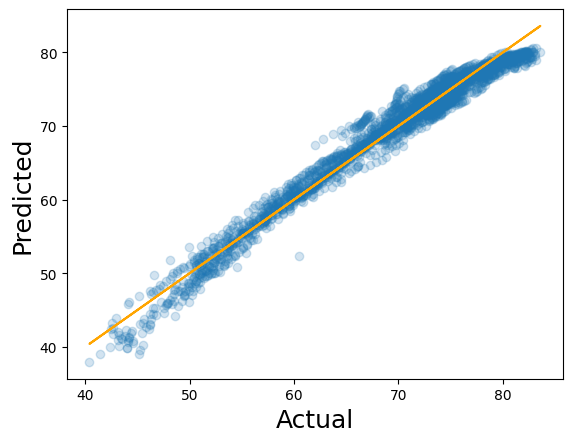

In [454]:
plt.scatter(y_train, y_hat,alpha=0.2)
plt.xlabel('Actual',size=18)
plt.ylabel('Predicted',size=18)
plt.plot(y_train,y_train,'orange')
plt.show()

#### Residual plot (Training data)

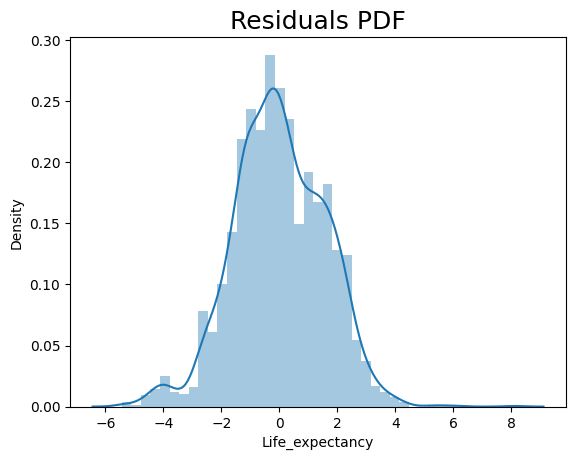

In [455]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)
plt.show()

#### Scatter plot (Test data)

In [456]:
y_hat_test =ridge_model.predict(x_test)

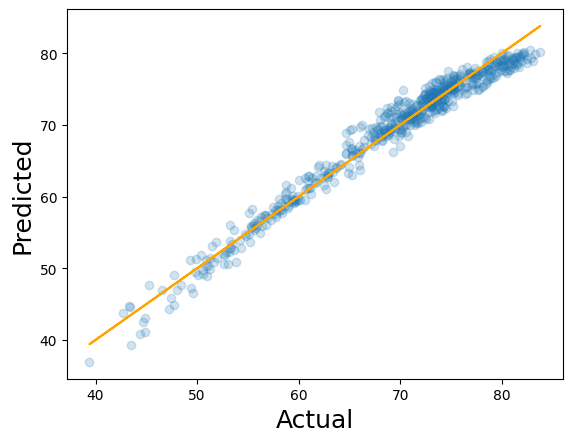

In [457]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Actual',size=18)
plt.ylabel('Predicted',size=18)
plt.plot(y_test,y_test,'orange')
plt.show()

In [458]:
ridge_train_mse = mean_squared_error(y_train, y_hat)
ridge_test_mse = mean_squared_error(y_test, y_hat_test)
ridge_train_mae = mean_absolute_error(y_train, y_hat)
ridge_test_mae = mean_absolute_error(y_test, y_hat_test)
ridge_train_r2 = r2_score(y_train, y_hat)
ridge_test_r2 = r2_score(y_test, y_hat_test)


table_ridge = PrettyTable()
table_ridge.field_names = ["Evaluation Metric", "Training Set", "Test Set"]

table_ridge.add_row(["Mean Squared Error (MSE)", ridge_train_mse, ridge_test_mse])
table_ridge.add_row(["Mean Absolute Error (MAE)", ridge_train_mae, ridge_test_mae])
table_ridge.add_row(["R-Square", ridge_train_r2 , ridge_test_r2])

print(table_ridge)

+---------------------------+--------------------+--------------------+
|     Evaluation Metric     |    Training Set    |      Test Set      |
+---------------------------+--------------------+--------------------+
|  Mean Squared Error (MSE) | 2.484068691455747  | 2.4105486912615555 |
| Mean Absolute Error (MAE) | 1.2512883501798457 | 1.2163779308498417 |
|          R-Square         | 0.9723311901362656 | 0.9709541664631974 |
+---------------------------+--------------------+--------------------+


### Prediction

In [459]:
ridge_df = pd.DataFrame(y_hat_test, columns=['Predicted'])

ridge_df['Actual'] = y_test

y_test = y_test.reset_index(drop=True)

ridge_df['Actual'] = y_test

ridge_df['Residual'] = ridge_df['Actual'] - ridge_df['Predicted']
ridge_df['Difference%'] = np.absolute(ridge_df['Residual']/ridge_df['Actual']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
sorted_ridge_df=ridge_df.sort_values(by=['Difference%'])

sorted_ridge_df.head(20)

,Predicted,Actual,Residual,Difference%
286,59.50,59.50,0.00,0.00
196,77.00,77.00,-0.00,0.00
288,72.10,72.10,0.00,0.00
238,58.70,58.70,-0.00,0.00
101,69.01,69.00,-0.01,0.01
107,58.21,58.20,-0.01,0.02
208,73.02,73.00,-0.02,0.02
431,53.41,53.40,-0.01,0.03
556,70.87,70.90,0.03,0.04
151,72.13,72.10,-0.03,0.04


### Evaluating the Aggregate Performance

In [460]:
sorted_ridge_df.describe()

,Predicted,Actual,Residual,Difference%
count,573.00,573.00,573.00,573.00
mean,69.06,69.09,0.03,1.79
std,8.94,9.12,1.55,1.48
min,36.93,39.40,-4.62,0.00
25%,64.08,63.70,-0.97,0.60
50%,71.90,71.50,-0.09,1.47
75%,75.42,75.20,1.00,2.57
max,80.43,83.80,4.22,9.69


## LASSO

#### Hyperparameter tuning

In [461]:
lasso = Lasso()
param_grid = {
    'alpha':[0.01,0.1,1,10]
}

lasso_grid = GridSearchCV(
    lasso,param_grid,cv=5,
    scoring = 'neg_mean_squared_error',
    return_train_score=True
)


In [462]:
lasso_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.01, 0.1, 1, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [463]:
lasso_grid.best_params_

{'alpha': 0.01}

In [464]:
best_lasso_params =lasso_grid.best_params_

In [465]:
lasso_model = Lasso(**best_lasso_params)

In [466]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.01)

In [467]:
y_hat = lasso_model.predict(x_train)

###Evaluation

#### Scatter plot (Training data)

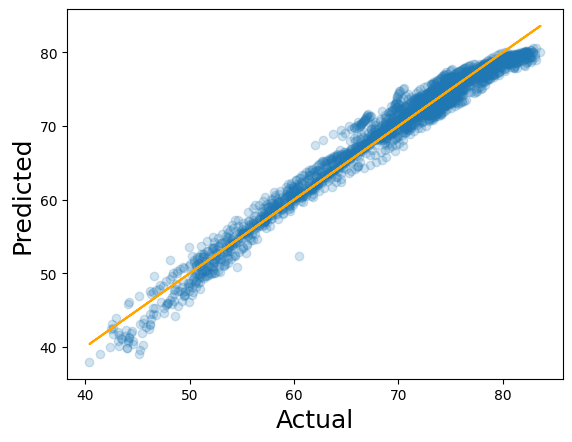

In [468]:
plt.scatter(y_train, y_hat,alpha=0.2)
plt.xlabel('Actual',size=18)
plt.ylabel('Predicted',size=18)
plt.plot(y_train,y_train,'orange')
plt.show()

#### Residual plot (Training data)

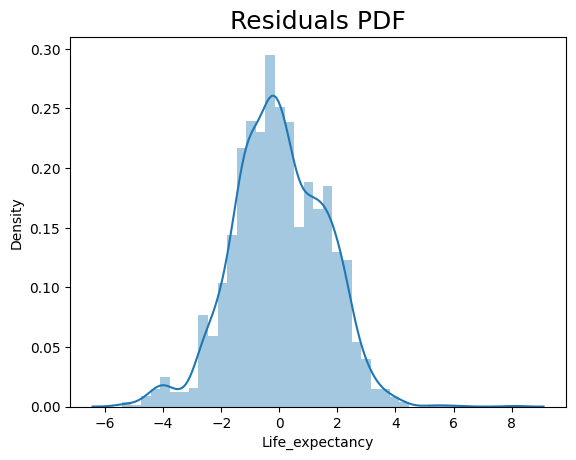

In [469]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)
plt.show()

####Scatter plot (Test data)

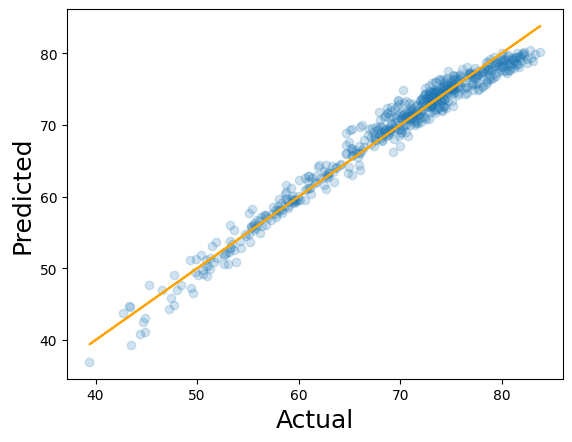

In [470]:
y_hat_test = lasso_model.predict(x_test)
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Actual',size=18)
plt.ylabel('Predicted',size=18)
plt.plot(y_test,y_test,'orange')
plt.show()


In [471]:
lasso_train_mse = mean_squared_error(y_train, y_hat)
lasso_test_mse = mean_squared_error(y_test, y_hat_test)
lasso_train_mae = mean_absolute_error(y_train, y_hat)
lasso_test_mae = mean_absolute_error(y_test, y_hat_test)
lasso_train_r2 = r2_score(y_train, y_hat)
lasso_test_r2 = r2_score(y_test, y_hat_test)


table_lasso = PrettyTable()
table_lasso.field_names = ["Evaluation Metric", "Training Set", "Test Set"]

table_lasso.add_row(["Mean Squared Error (MSE)", lasso_train_mse, lasso_test_mse])
table_lasso.add_row(["Mean Absolute Error (MAE)", lasso_train_mae, lasso_test_mae])
table_lasso.add_row(["R-Square", lasso_train_r2 , lasso_test_r2])

print(table_lasso)

+---------------------------+--------------------+--------------------+
|     Evaluation Metric     |    Training Set    |      Test Set      |
+---------------------------+--------------------+--------------------+
|  Mean Squared Error (MSE) | 2.4841812489326727 | 2.411003561388284  |
| Mean Absolute Error (MAE) | 1.2517541816066138 | 1.2163926151321227 |
|          R-Square         | 0.972329936414322  | 0.9709486855193651 |
+---------------------------+--------------------+--------------------+


### Prediction

In [472]:
lasso_df = pd.DataFrame(y_hat_test, columns=['Predicted'])

lasso_df['Actual'] = y_test

y_test = y_test.reset_index(drop=True)

lasso_df['Actual'] = y_test

lasso_df['Residual'] = lasso_df['Actual'] - lasso_df['Predicted']
lasso_df['Difference%'] = np.absolute(lasso_df['Residual']/lasso_df['Actual']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
sorted_lasso_df=lasso_df.sort_values(by=['Difference%'])

sorted_lasso_df.head(10)

,Predicted,Actual,Residual,Difference%
288,72.10,72.10,0.00,0.00
196,76.99,77.00,0.01,0.02
101,69.01,69.00,-0.01,0.02
286,59.51,59.50,-0.01,0.02
238,58.71,58.70,-0.01,0.02
88,80.02,80.00,-0.02,0.03
151,72.12,72.10,-0.02,0.03
208,73.02,73.00,-0.02,0.03
556,70.87,70.90,0.03,0.04
10,63.38,63.40,0.02,0.04


### Evaluating the Aggregate Performance

In [473]:
sorted_lasso_df.describe()

,Predicted,Actual,Residual,Difference%
count,573.00,573.00,573.00,573.00
mean,69.06,69.09,0.03,1.79
std,8.93,9.12,1.55,1.48
min,36.95,39.40,-4.61,0.00
25%,64.09,63.70,-0.96,0.60
50%,71.90,71.50,-0.09,1.46
75%,75.41,75.20,0.99,2.57
max,80.42,83.80,4.22,9.67


## Support vector regressor

In [474]:
SVR = SVR(kernel='linear',C=1)
SVR.fit(x_train, y_train)
y_hat = SVR.predict(x_train)


### Evaluation

#### Scatter plot (Training data)

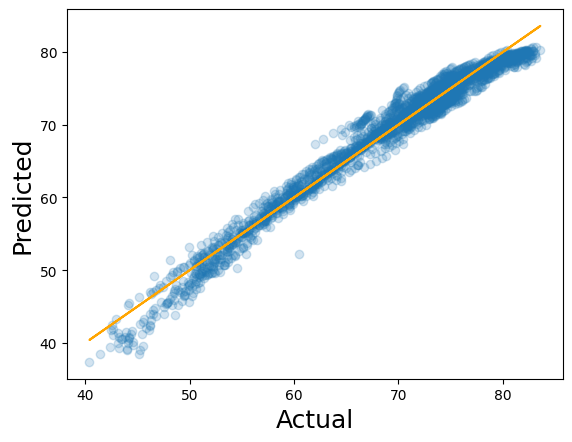

In [475]:
plt.scatter(y_train, y_hat,alpha=0.2)
plt.xlabel('Actual',size=18)
plt.ylabel('Predicted',size=18)
plt.plot(y_train,y_train,'orange')
plt.show()

#### Residual plot (Training data)

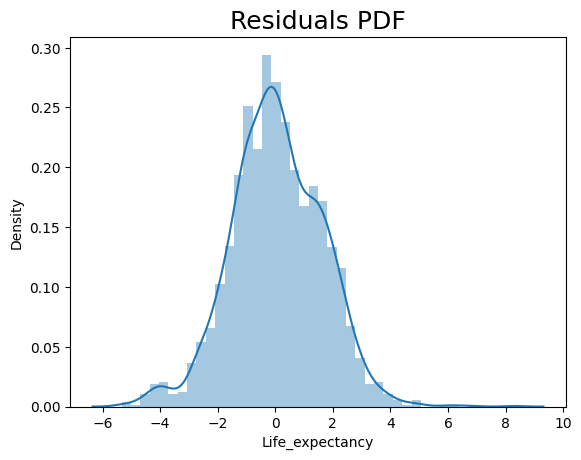

In [476]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)
plt.show()

#### Scatter plot (Test data)

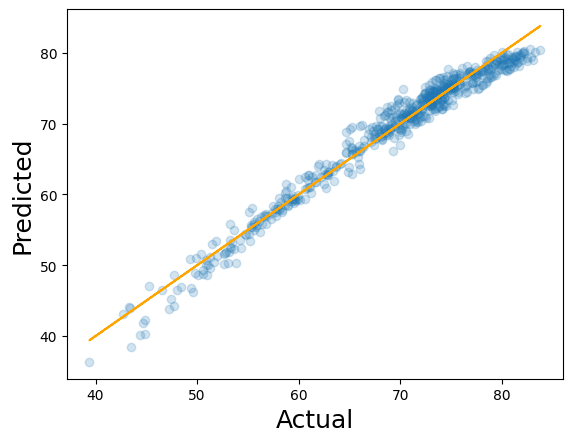

In [477]:
y_hat_test = SVR.predict(x_test)
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Actual',size=18)
plt.ylabel('Predicted',size=18)
plt.plot(y_test,y_test,'orange')
plt.show()

In [478]:
SVR_train_mse = mean_squared_error(y_train, y_hat)
SVR_test_mse = mean_squared_error(y_test, y_hat_test)
SVR_train_mae = mean_absolute_error(y_train, y_hat)
SVR_test_mae = mean_absolute_error(y_test, y_hat_test)
SVR_train_r2 = r2_score(y_train, y_hat)
SVR_test_r2 = r2_score(y_test, y_hat_test)


table_SVR = PrettyTable()
table_SVR.field_names = ["Evaluation Metric", "Training Set", "Test Set"]

table_SVR.add_row(["Mean Squared Error (MSE)",SVR_train_mse, SVR_test_mse])
table_SVR.add_row(["Mean Absolute Error (MAE)", SVR_train_mae, SVR_test_mae])
table_SVR.add_row(["R-Square", SVR_train_r2 , SVR_test_r2])

print(table_SVR)


+---------------------------+--------------------+--------------------+
|     Evaluation Metric     |    Training Set    |      Test Set      |
+---------------------------+--------------------+--------------------+
|  Mean Squared Error (MSE) | 2.5156922151948695 | 2.4263496545452354 |
| Mean Absolute Error (MAE) | 1.2428183901040872 | 1.2113431073868983 |
|          R-Square         | 0.9719789513803211 | 0.9707637732340862 |
+---------------------------+--------------------+--------------------+


### Prediction

In [479]:
SVR_df = pd.DataFrame(y_hat_test, columns=['Predicted'])

SVR_df['Actual'] = y_test

y_test = y_test.reset_index(drop=True)

SVR_df['Actual'] = y_test

SVR_df['Residual'] = SVR_df['Actual'] - SVR_df['Predicted']
SVR_df['Difference%'] = np.absolute(SVR_df['Residual']/SVR_df['Actual']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
sorted_SVR_df=SVR_df.sort_values(by=['Difference%'])

sorted_SVR_df.head(10)

,Predicted,Actual,Residual,Difference%
551,61.00,61.00,-0.00,0.00
187,57.91,57.90,-0.01,0.01
202,68.21,68.20,-0.01,0.02
3,55.39,55.40,0.01,0.02
101,69.01,69.00,-0.01,0.02
196,77.01,77.00,-0.01,0.02
172,74.91,74.90,-0.01,0.02
330,56.89,56.90,0.01,0.02
377,74.72,74.70,-0.02,0.03
398,57.38,57.40,0.02,0.03


### Descriptive statistics

In [480]:
sorted_SVR_df.describe()

,Predicted,Actual,Residual,Difference%
count,573.00,573.00,573.00,573.00
mean,69.01,69.09,0.08,1.79
std,9.09,9.12,1.56,1.57
min,36.34,39.40,-4.62,0.00
25%,63.89,63.70,-0.90,0.59
50%,71.91,71.50,-0.01,1.44
75%,75.50,75.20,1.06,2.51
max,80.53,83.80,5.09,11.69


## Neural network

In [481]:
def Neural_network_model():

  NN = Sequential()

  NN.add(Dense(128, input_dim=3, activation='relu'))

  NN.add(Dense(64, activation='relu'))

  NN.add(Dense(1, activation='linear'))

  NN.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

  return NN


NN_model=Neural_network_model()


In [482]:
NN_model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 128)               512       
                                                                 
 dense_73 (Dense)            (None, 64)                8256      
                                                                 
 dense_74 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


### Early stopping (To avoid overfiiting)

In [483]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

history = NN_model.fit(x_train, y_train, validation_split=0.2,callbacks=[early_stop],epochs =100)

Epoch 1/100
58/58 [==============================] - 2s 8ms/step - loss: 4354.1982 - mae: 65.0887 - val_loss: 3439.7002 - val_mae: 57.3202
Epoch 2/100
58/58 [==============================] - 0s 5ms/step - loss: 2052.0215 - mae: 42.0718 - val_loss: 733.6274 - val_mae: 23.1445
Epoch 3/100
58/58 [==============================] - 0s 5ms/step - loss: 440.6841 - mae: 17.6423 - val_loss: 328.1417 - val_mae: 15.3998
Epoch 4/100
58/58 [==============================] - 0s 5ms/step - loss: 206.9364 - mae: 11.9815 - val_loss: 172.4111 - val_mae: 10.7080
Epoch 5/100
58/58 [==============================] - 0s 4ms/step - loss: 114.9565 - mae: 8.6152 - val_loss: 108.9467 - val_mae: 8.1506
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 74.6834 - mae: 6.6825 - val_loss: 77.7394 - val_mae: 6.3824
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 53.4290 - mae: 5.4446 - val_loss: 57.3389 - val_mae: 5.4852
Epoch 8/100
58/58 [=============================

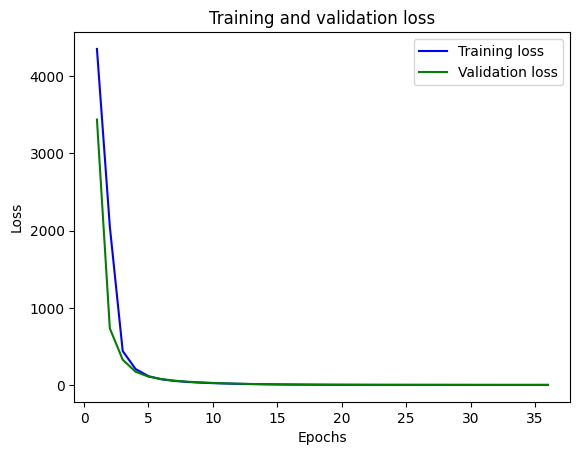

In [484]:
loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, color='blue', label='Training loss')

plt.plot(epochs, val_loss,color='green', label='Validation loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

It is evident from the plot that 5-10 epochs are enough for our problem.

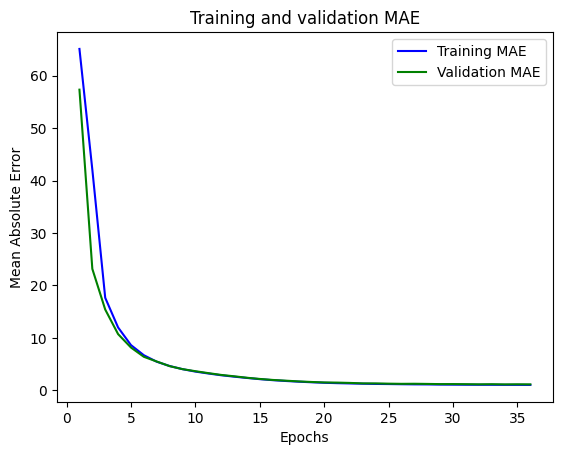

In [485]:
acc = history.history['mae']

val_acc = history.history['val_mae']

plt.plot(epochs, acc,color='blue', label='Training MAE')

plt.plot(epochs, val_acc, color='green', label='Validation MAE')

plt.title('Training and validation MAE')

plt.xlabel('Epochs')

plt.ylabel('Mean Absolute Error')

plt.legend()

plt.show()

### Evaluation

#### Scatter plot (Training data)

72/72 [==============================] - 0s 1ms/step


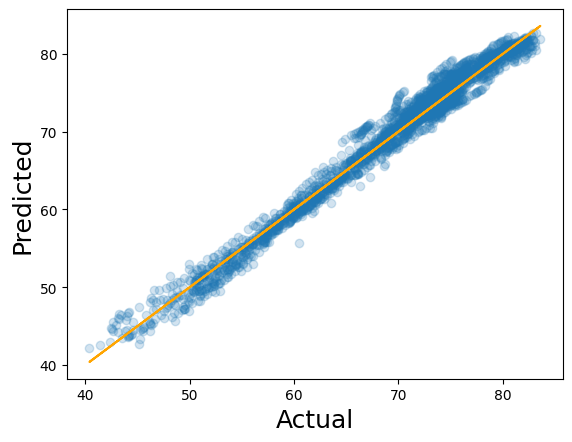

In [486]:
y_hat = NN_model.predict(x_train)
y_hat=y_hat.ravel()
plt.scatter(y_train, y_hat,alpha=0.2)
plt.xlabel('Actual',size=18)
plt.ylabel('Predicted',size=18)
plt.plot(y_train,y_train,'orange')
plt.show()

#### Residual plot (Training data)

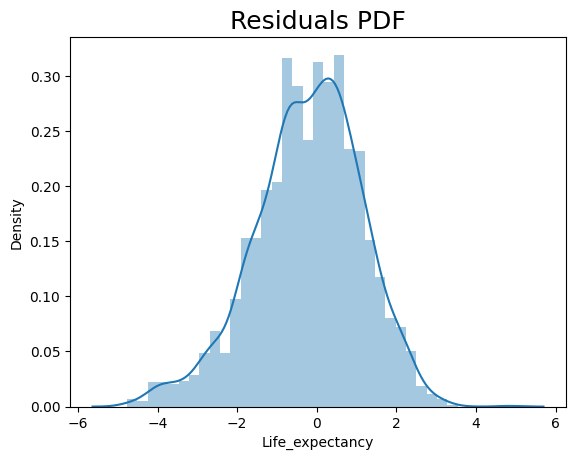

In [487]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)
plt.show()

#### Scatter plot (Test data)

18/18 [==============================] - 0s 1ms/step


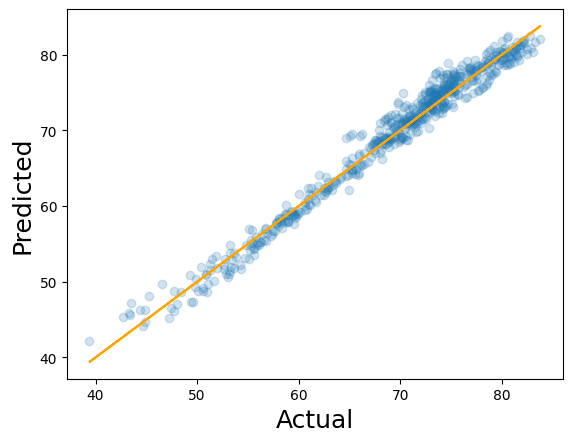

In [488]:
y_hat_test = NN_model.predict(x_test)
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Actual',size=18)
plt.ylabel('Predicted',size=18)
plt.plot(y_test,y_test,'orange')
plt.show()

In [489]:
NN_train_mse = mean_squared_error(y_train, y_hat)
NN_test_mse = mean_squared_error(y_test, y_hat_test)
NN_train_mae = mean_absolute_error(y_train, y_hat)
NN_test_mae = mean_absolute_error(y_test, y_hat_test)
NN_train_r2 = r2_score(y_train, y_hat)
NN_test_r2 = r2_score(y_test, y_hat_test)

table_NN = PrettyTable()
table_NN.field_names = ["Evaluation Metric", "Training Set", "Test Set"]

table_NN.add_row(["Mean Squared Error (MSE)", NN_train_mse, NN_test_mse])
table_NN.add_row(["Mean Absolute Error (MAE)", NN_train_mae, NN_test_mae])
table_NN.add_row(["R-Square", NN_train_r2 , NN_test_r2])

print(table_NN)

+---------------------------+--------------------+--------------------+
|     Evaluation Metric     |    Training Set    |      Test Set      |
+---------------------------+--------------------+--------------------+
|  Mean Squared Error (MSE) | 1.8667610657643596 | 1.980553637151368  |
| Mean Absolute Error (MAE) | 1.071412190138019  | 1.1129923702326536 |
|          R-Square         | 0.9792070737949734 | 0.9761353788604449 |
+---------------------------+--------------------+--------------------+


### Prediction

In [490]:
NN_df = pd.DataFrame(y_hat_test, columns=['Predicted'])

NN_df['Actual'] = y_test

y_test = y_test.reset_index(drop=True)

NN_df['Actual'] = y_test

NN_df['Residual'] = NN_df['Actual'] - NN_df['Predicted']
NN_df['Difference%'] = np.absolute(NN_df['Residual']/NN_df['Actual']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
sorted_NN_df=NN_df.sort_values(by=['Difference%'])

sorted_NN_df.head(10)

,Predicted,Actual,Residual,Difference%
491,75.00,75.00,-0.00,0.00
465,58.40,58.40,-0.00,0.01
254,68.21,68.20,-0.01,0.01
171,50.89,50.90,0.01,0.01
560,71.61,71.60,-0.01,0.01
378,59.19,59.20,0.01,0.02
4,78.98,79.00,0.02,0.02
65,79.68,79.70,0.02,0.02
160,80.98,81.00,0.02,0.03
197,60.92,60.90,-0.02,0.04


### Descriptive statistics

In [491]:
sorted_NN_df.describe()

,Predicted,Actual,Residual,Difference%
count,573.00,573.00,573.00,573.00
mean,69.29,69.09,-0.20,1.65
std,9.29,9.12,1.39,1.35
min,42.14,39.40,-4.67,0.00
25%,63.36,63.70,-1.04,0.67
50%,71.86,71.50,-0.09,1.28
75%,76.09,75.20,0.75,2.25
max,82.49,83.80,2.92,8.62


In [492]:
keras_regressor = KerasRegressor(build_fn=Neural_network_model,epochs=30)

In [493]:
LR = LinearRegression()

#Model selection using Cross-validation

In [494]:
models = [LR,ridge_model,lasso_model,SVR,keras_regressor]

cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
    cv_scores.append(scores.mean())

Epoch 1/30
58/58 [==============================] - 1s 2ms/step - loss: 4478.0649 - mae: 66.1330
Epoch 2/30
58/58 [==============================] - 0s 2ms/step - loss: 2468.6899 - mae: 46.9694
Epoch 3/30
58/58 [==============================] - 0s 2ms/step - loss: 472.0854 - mae: 18.5280
Epoch 4/30
58/58 [==============================] - 0s 2ms/step - loss: 199.5298 - mae: 11.7262
Epoch 5/30
58/58 [==============================] - 0s 2ms/step - loss: 111.4888 - mae: 8.4522
Epoch 6/30
58/58 [==============================] - 0s 3ms/step - loss: 72.8544 - mae: 6.5879
Epoch 7/30
58/58 [==============================] - 0s 3ms/step - loss: 51.7379 - mae: 5.3576
Epoch 8/30
58/58 [==============================] - 0s 3ms/step - loss: 38.9255 - mae: 4.5482
Epoch 9/30
58/58 [==============================] - 0s 3ms/step - loss: 30.2304 - mae: 3.9474
Epoch 10/30
58/58 [==============================] - 0s 3ms/step - loss: 23.7703 - mae: 3.5052
Epoch 11/30
58/58 [=============================

In [495]:
Model_names=['Ordinary Least Square','Ridge','Lasso','Support vector regressor','Neural Network']

model_score_df = pd.DataFrame({'Model': Model_names, 'CV Score': cv_scores})

model_score_df = model_score_df.sort_values(by=['CV Score'], ascending=False)

model_score_df = model_score_df.reset_index(drop=True)

model_score_df

,Model,CV Score
0,Neural Network,0.98
1,Ridge,0.97
2,Ordinary Least Square,0.97
3,Lasso,0.97
4,Support vector regressor,0.97


In [496]:
best_model_index = cv_scores.index(max(cv_scores))
best_model = models[best_model_index]
print(best_model)

SVR(C=1, kernel='linear')


# Manual testing

In [497]:
def predict_target(feature_values):

    standardized_features = scaler.transform(feature_values)

    prediction = best_model.predict(standardized_features)

    print(prediction)

In [498]:
predict_target([[7.8,105.824,13]])

[75.43864392]


In [499]:
pickle.dump(best_model, open('model_updated.pkl','wb'))

In [500]:
# best_model = pickle.load(open('model.pkl','rb'))